# Sentimental Analysis using Vader

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
page=10
page_size=100

reviews= []

for i in range(1,page+1):
    
    print(f"scraping page {i}")
    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    
    response=requests.get(url)
    
    content=response.content
    
    parsed_content=BeautifulSoup(content,"html.parser")
    
#     print(parsed_content)
    
    for para in parsed_content.findAll("div",{"class":"text_content"}):
        reviews.append(para.get_text())
        
    print(f"---> {len(reviews)} total reviews")
        
    

scraping page 1
---> 100 total reviews
scraping page 2
---> 200 total reviews
scraping page 3
---> 300 total reviews
scraping page 4
---> 400 total reviews
scraping page 5
---> 500 total reviews
scraping page 6
---> 600 total reviews
scraping page 7
---> 700 total reviews
scraping page 8
---> 800 total reviews
scraping page 9
---> 900 total reviews
scraping page 10
---> 1000 total reviews


In [3]:
df=pd.DataFrame()
df["reviews"]=reviews
df.head(10)

,reviews
0,Not Verified | Flew with BA to Punta Cana. To...
1,✅ Trip Verified | They downgraded me from bu...
2,✅ Trip Verified | The already delayed aircra...
3,✅ Trip Verified | Caught up in the Gatwick c...
4,✅ Trip Verified | BA has a real problem with...
5,✅ Trip Verified | Our connecting flight from L...
6,✅ Trip Verified | The worst airline I have e...
7,"✅ Trip Verified | Excellent service levels, ..."
8,Not Verified | Booked a very special holiday ...
9,"Not Verified | Just returned from Chicago, fle..."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df["reviews"]=df["reviews"].str.split("|",expand=True)[1]

In [5]:
df.head(5)

,reviews
0,Flew with BA to Punta Cana. Took the trouble...
1,They downgraded me from business to premium...
2,The already delayed aircraft landed and apa...
3,Caught up in the Gatwick cancellation fiasc...
4,BA has a real problem with boarding it's fl...


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def clean_data(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
df['cleanrevs']=df['reviews'].apply(clean_data)    

In [10]:
df.head(10)

,reviews,cleanrevs
0,Flew with BA to Punta Cana. Took the trouble...,Flew with BA to Punta Cana Took the trouble t...
1,They downgraded me from business to premium...,They downgraded me from business to premium e...
2,The already delayed aircraft landed and apa...,The already delayed aircraft landed and apart...
3,Caught up in the Gatwick cancellation fiasc...,Caught up in the Gatwick cancellation fiasco ...
4,BA has a real problem with boarding it's fl...,BA has a real problem with boarding it s flig...
5,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...
6,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...
7,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...
8,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...
9,"Just returned from Chicago, flew out 10 days ...",Just returned from Chicago flew out days ago ...


In [13]:
stop_words=set(stopwords.words('english'))
word_tokens=[]
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def stop_words_remove(text):
    tags=pos_tag(word_tokenize(text))
    filtered_sentence = []
    for word,tag in tags:
        if word not in stop_words:
            filtered_sentence.append(tuple([word,pos_dict.get(tag[0])]))
      
    return filtered_sentence 

df['postagged']=df['cleanrevs'].apply(stop_words_remove)

In [14]:
lemmatizer=WordNetLemmatizer()
def lemma(posdata):
    lemma_rew=" "
    for word, pos in posdata:
        if not pos:
            lemma=word
            lemma_rew=lemma_rew+" "+lemma
        else:
            lemma=lemmatizer.lemmatize(word,pos=pos)
            lemma_rew=lemma_rew+" "+lemma
    return lemma_rew        
    
df['lemmatize']=df['postagged'].apply(lemma)    

In [16]:
df[['reviews','lemmatize']]


,reviews,lemmatize
0,Flew with BA to Punta Cana. Took the trouble...,Flew BA Punta Cana Took trouble reserve seat...
1,They downgraded me from business to premium...,They downgrade business premium economy They...
2,The already delayed aircraft landed and apa...,The already delay aircraft land apart small ...
3,Caught up in the Gatwick cancellation fiasc...,Caught Gatwick cancellation fiasco point smo...
4,BA has a real problem with boarding it's fl...,BA real problem board flight Those get first...
...,...,...
995,Gatwick to Barbados. We flew out of Gatwick ...,Gatwick Barbados We fly Gatwick th December ...
996,Moscow to London. Fantastic first class serv...,Moscow London Fantastic first class service ...
997,Johannesburg to London . For supper I asked ...,Johannesburg London For supper I ask warm ho...
998,Bridgetown to Gatwick. Booked our return fli...,Bridgetown Gatwick Booked return flight Busi...


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyze=SentimentIntensityAnalyzer()

def sentiment_analyzer(text):
    vs=analyze.polarity_scores(text)
#     print(vs)
    return vs['compound']

df['sentiment']=df['lemmatize'].apply(sentiment_analyzer)

def vader_analysis(comp):
    if(comp>=.5):
        return "Positive"
    elif(comp<0):
        return "Negative"
    else:
        return "Neutral"
df['analysis']=df['sentiment'].apply(vader_analysis)    

In [30]:
df.head(10)

,reviews,cleanrevs,postagged,lemmatize,sentiment,analysis
0,Flew with BA to Punta Cana. Took the trouble...,Flew with BA to Punta Cana Took the trouble t...,"[(Flew, n), (BA, n), (Punta, n), (Cana, n), (T...",Flew BA Punta Cana Took trouble reserve seat...,0.4751,Neutral
1,They downgraded me from business to premium...,They downgraded me from business to premium e...,"[(They, None), (downgraded, v), (business, n),...",They downgrade business premium economy They...,-0.9324,Negative
2,The already delayed aircraft landed and apa...,The already delayed aircraft landed and apart...,"[(The, None), (already, r), (delayed, v), (air...",The already delay aircraft land apart small ...,-0.9254,Negative
3,Caught up in the Gatwick cancellation fiasc...,Caught up in the Gatwick cancellation fiasco ...,"[(Caught, n), (Gatwick, n), (cancellation, n),...",Caught Gatwick cancellation fiasco point smo...,0.4404,Neutral
4,BA has a real problem with boarding it's fl...,BA has a real problem with boarding it s flig...,"[(BA, n), (real, a), (problem, n), (boarding, ...",BA real problem board flight Those get first...,-0.7783,Negative
5,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...,"[(Our, None), (connecting, v), (flight, n), (L...",Our connect flight London Glasgow cancel for...,-0.2500,Negative
6,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...,"[(The, None), (worst, a), (airline, n), (I, No...",The bad airline I ever fly Allocated back ro...,-0.6992,Negative
7,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...,"[(Excellent, a), (service, n), (levels, n), (p...",Excellent service level proactive crew super...,0.9925,Positive
8,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...,"[(Booked, v), (special, a), (holiday, n), (par...",Booked special holiday partner September arr...,0.9203,Positive
9,"Just returned from Chicago, flew out 10 days ...",Just returned from Chicago flew out days ago ...,"[(Just, r), (returned, v), (Chicago, n), (flew...",Just return Chicago fly day ago American Air...,0.8074,Positive


In [31]:
review_counts=df['analysis'].value_counts()
review_counts

Positive    473
Negative    420
Neutral     107
Name: analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x26236a01910>,
 [Text(0.09319348883631644, 1.0960451512773166, 'Positive'),
  Text(-0.44951408673530097, -1.003960699343619, 'Negative'),
  Text(1.2744424129677328, -0.4453049921446907, 'Neutral')],
 [Text(0.050832812092536234, 0.5978428097876272, '47.3%'),
  Text(-0.2451895018556187, -0.5476149269147012, '42.0%'),
  Text(0.802426704461165, -0.2803772172762867, '10.7%')])

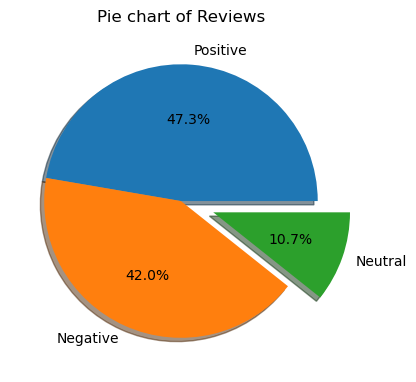

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
plt.title("Pie chart of Reviews")
plt.pie(review_counts.values, labels=review_counts.index,explode=(0,0,0.25),autopct="%1.1f%%",shadow=True)

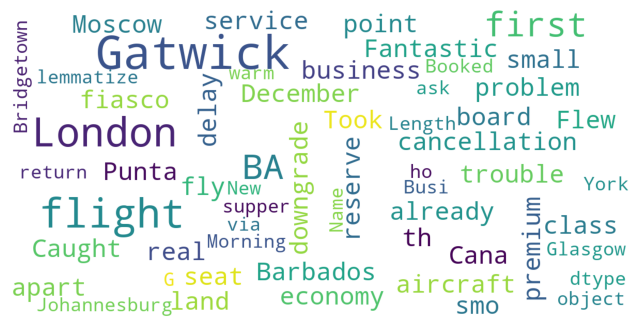

In [49]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

def disp_wordcloud(data):
    wordcloud=WordCloud(
        background_color='White',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1
        )
    wordcloud=wordcloud.generate(str(data))
    fig=plt.figure(1,figsize=(8,8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
disp_wordcloud(df['lemmatize'])    
               